In [2]:
import pandas as pd

In [382]:
# test
import datetime

import numpy as np
import matplotlib.pyplot as plt
try:
     from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
     # quotes_historical_yahoo_ochl was named quotes_historical_yahoo before matplotlib 1.4
     
     from matplotlib.finance import quotes_historical_yahoo as quotes_historical_yahoo_ochl
from matplotlib.collections import LineCollection
from sklearn import cluster, covariance, manifold

In [737]:
datapath = '/Users/apple/Desktop/big_data/project/data/'
# zipcode by restaurant
restaurant = pd.read_csv(datapath+ 'restaurant_summary.csv')
# zipcode by business
business = pd.read_csv(datapath+ 'business_summary.csv',index_col = 0)
business = business.rename(columns = {'zipcode':'ZIPCODE','count':'business_amount'})
# ZIPCODE BY CRIME
crime = dict([
 ('00083', 5397),
 ('10001', 81415),
 ('10002', 57945),
 ('10003', 58878),
 ('10004', 4983),
 ('10005', 3348),
 ('10006', 3623),
 ('10007', 15804),
 ('10009', 34083),
 ('10010', 21027),
 ('10011', 49565),
 ('10012', 31773),
 ('10013', 34247),
 ('10014', 29587),
 ('10016', 28789),
 ('10017', 17083),
 ('10018', 30819),
 ('10019', 46790),
 ('10020', 3817),
 ('10021', 11004),
 ('10022', 27040),
 ('10023', 30857),
 ('10024', 24206),
 ('10025', 48674),
 ('10026', 33806),
 ('10027', 70348),
 ('10028', 15964),
 ('10029', 78570),
 ('10030', 28851),
 ('10031', 48969),
 ('10032', 37421),
 ('10033', 30079),
 ('10034', 22328),
 ('10035', 52059),
 ('10036', 52377),
 ('10037', 16218),
 ('10038', 13315),
 ('10039', 26237),
 ('10040', 18911),
 ('10044', 1440),
 ('10048', 258),
 ('10065', 15692),
 ('10069', 589),
 ('10075', 6457),
 ('10111', 371),
 ('10115', 59),
 ('10128', 17053),
 ('10169', 22),
 ('10280', 1324),
 ('10281', 237),
 ('10282', 1250),
 ('10301', 33119),
 ('10302', 16159),
 ('10303', 19771),
 ('10304', 31932),
 ('10305', 20734),
 ('10306', 25250),
 ('10307', 5716),
 ('10308', 10067),
 ('10309', 13817),
 ('10310', 18615),
 ('10312', 18732),
 ('10314', 42598),
 ('10451', 56797),
 ('10452', 67130),
 ('10453', 60994),
 ('10454', 48587),
 ('10455', 52563),
 ('10456', 85492),
 ('10457', 79865),
 ('10458', 68116),
 ('10459', 53764),
 ('10460', 54974),
 ('10461', 32873),
 ('10462', 47165),
 ('10463', 39495),
 ('10464', 2534),
 ('10465', 22836),
 ('10466', 42012),
 ('10467', 71601),
 ('10468', 63895),
 ('10469', 34848),
 ('10470', 9906),
 ('10471', 9276),
 ('10472', 61723),
 ('10473', 50192),
 ('10474', 21706),
 ('10475', 21728),
 ('11001', 814),
 ('11004', 2865),
 ('11005', 391),
 ('11040', 1124),
 ('11096', 64),
 ('11101', 34361),
 ('11102', 16349),
 ('11103', 19366),
 ('11104', 9613),
 ('11105', 14194),
 ('11106', 19967),
 ('11109', 354),
 ('11201', 61944),
 ('11203', 54558),
 ('11204', 21582),
 ('11205', 30881),
 ('11206', 75118),
 ('11207', 98757),
 ('11208', 79752),
 ('11209', 34015),
 ('11210', 35171),
 ('11211', 49520),
 ('11212', 93101),
 ('11213', 56057),
 ('11214', 36690),
 ('11215', 29572),
 ('11216', 54451),
 ('11217', 34989),
 ('11218', 24178),
 ('11219', 24166),
 ('11220', 42589),
 ('11221', 68189),
 ('11222', 20120),
 ('11223', 32956),
 ('11224', 37632),
 ('11225', 42029),
 ('11226', 75691),
 ('11228', 13767),
 ('11229', 32855),
 ('11230', 25537),
 ('11231', 23254),
 ('11232', 19507),
 ('11233', 74915),
 ('11234', 48162),
 ('11235', 35495),
 ('11236', 59597),
 ('11237', 32127),
 ('11238', 31127),
 ('11239', 10957),
 ('11251', 867),
 ('11354', 32459),
 ('11355', 22441),
 ('11356', 9847),
 ('11357', 9677),
 ('11358', 10247),
 ('11359', 18),
 ('11360', 4051),
 ('11361', 10398),
 ('11362', 4853),
 ('11363', 1763),
 ('11364', 8581),
 ('11365', 12736),
 ('11366', 3941),
 ('11367', 15497),
 ('11368', 43628),
 ('11369', 23785),
 ('11370', 19977),
 ('11371', 646),
 ('11372', 34895),
 ('11373', 41618),
 ('11374', 15857),
 ('11375', 21804),
 ('11377', 35106),
 ('11378', 16729),
 ('11379', 11795),
 ('11385', 53581),
 ('11411', 7962),
 ('11412', 19323),
 ('11413', 20970),
 ('11414', 10011),
 ('11415', 6167),
 ('11416', 13005),
 ('11417', 16767),
 ('11418', 20442),
 ('11419', 25194),
 ('11420', 24013),
 ('11421', 16374),
 ('11422', 12453),
 ('11423', 13603),
 ('11426', 6137),
 ('11427', 7751),
 ('11428', 6867),
 ('11429', 12704),
 ('11430', 1578),
 ('11432', 39902),
 ('11433', 34348),
 ('11434', 41584),
 ('11435', 29495),
 ('11436', 12375),
 ('11451', 27),
 ('11691', 39422),
 ('11692', 11044),
 ('11693', 10011),
 ('11694', 8622),
 ('11697', 853)])
#population and area 
other = pd.read_csv(datapath+'zipcode.csv')
other = other[['ZIPCODE','POPULATION','AREA']]

In [738]:
#crime = pd.Series(crime)
#crime.index = [float(x) for x in crime.index]
crime = pd.read_csv('/Users/apple/Desktop/big_data/project/data/crime_summary.csv',index_col =0)

In [739]:
crime = crime[['ARSON',
       'ASSAULT 3 & RELATED OFFENSES',  'BURGLARY','DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT','ROBBERY','THEFT OF SERVICES',
       'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE',
       'VEHICLE AND TRAFFIC LAWS',]]


In [601]:
data = pd.merge(business,restaurant, on='ZIPCODE', how='outer')
data = data.fillna(0)
data.index = data['ZIPCODE']
data = data.join(crime)
data = data.fillna(0)

In [421]:
restaurant.index = restaurant.ZIPCODE
#restaurant['crime_all'] = crime
restaurant = restaurant.dropna()
restaurant = restaurant.drop(['ZIPCODE'],1)

In [740]:
business.index = business.ZIPCODE
#business['crime_all'] = crime
business = business.join(crime)
business = business.dropna()
business = business.drop(['ZIPCODE'],1)

In [390]:
other = other[[True if x in data.index else False for x in other['ZIPCODE']]][['AREA','POPULATION','ZIPCODE']]
data_all = pd.merge(data,other,on ='ZIPCODE',how='left' )

In [391]:
data_all = data_all.fillna(0)

In [392]:
data_all.index = data_all['ZIPCODE']
data_all = data_all.drop(['ZIPCODE'],1)

In [289]:
len(data_all.columns[data_all.sum(0)>10000])

14

In [741]:
data_selected = data_all[data_all.columns[data_all.sum(0)>10000]]
data_selected = data_all[['crime_all','business_amount','restaurant_amount','POPULATION','AREA']]
data_selected = business[business.columns[business.sum(0)>1000]]
#data_selected = data_selected.drop(['sidewalk cafe', 'laundry jobber'],1)
#data_selected = crime[crime.columns[crime.sum(0)>3000]]
#data_selected = data_selected.drop(['FELONY', 'MISDEMEANOR', 'VIOLATION'],1)

In [742]:
names = data_selected.columns
names 

Index(['business_amount', 'cigarette retail dealer',
       'electronic & appliance service', 'electronics store', 'garage',
       'general vendor', 'home improvement contractor',
       'home improvement salesperson', 'laundry', 'laundry jobber',
       'locksmith', 'secondhand dealer - general', 'sidewalk cafe',
       'stoop line stand', 'ticket seller', 'tow truck driver', 'ARSON',
       'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'DANGEROUS DRUGS',
       'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'ROBBERY', 'THEFT OF SERVICES',
       'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE',
       'VEHICLE AND TRAFFIC LAWS'],
      dtype='object')

In [743]:
edge_model = covariance.GraphLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(data_selected)

/Users/apple/anaconda3/lib/python3.5/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -2.293e-03
  ConvergenceWarning)


GraphLassoCV(alphas=4, assume_centered=False, cv=None, enet_tol=0.0001,
       max_iter=100, mode='cd', n_jobs=1, n_refinements=4, tol=0.0001,
       verbose=False)

In [744]:
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))


Cluster 1: cigarette retail dealer, stoop line stand, ticket seller, THEFT-FRAUD
Cluster 2: electronic & appliance service, garage, laundry
Cluster 3: business_amount, electronics store, sidewalk cafe
Cluster 4: home improvement contractor, ARSON, THEFT OF SERVICES
Cluster 5: general vendor, home improvement salesperson, laundry jobber, locksmith, tow truck driver
Cluster 6: secondhand dealer - general, UNAUTHORIZED USE OF A VEHICLE
Cluster 7: ASSAULT 3 & RELATED OFFENSES, BURGLARY, DANGEROUS DRUGS, DANGEROUS WEAPONS, FELONY ASSAULT, ROBBERY, VEHICLE AND TRAFFIC LAWS


In [747]:
# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=4)

embedding = node_position_model.fit_transform(data_selected.T).T

In [748]:
% matplotlib inline

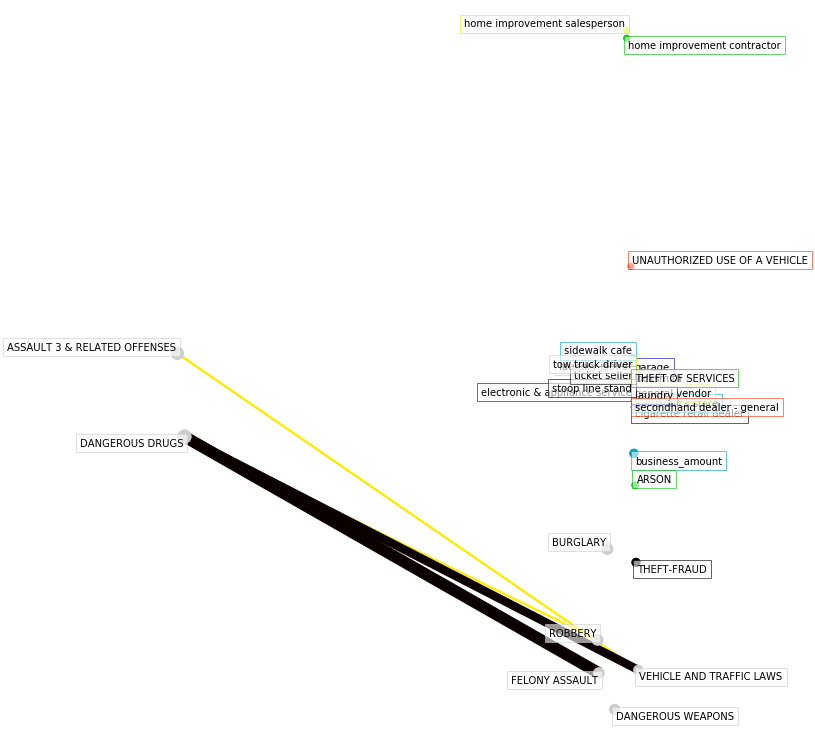

In [751]:
plt.figure(1, facecolor='w', figsize=(8,10))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.000002 ) & \
(np.abs(np.triu(partial_correlations, k=1)) < 0.2 )

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], c=labels, s= 5*d ** 0.5,
            cmap=plt.cm.spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(85 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

In [698]:
np.corrcoef(data_all['crime_all'], data_all['AREA'])

array([[ 1.        ,  0.28198797],
       [ 0.28198797,  1.        ]])

In [591]:
fig, ax = plt.subplots(nrows=2,ncols=)
plt.show()
for row in ax:
    for col in row:
        col.plot(x, y)

ax
plt.scatter(np.log(data_all['crime_all']), np.log(data_all['AREA']))
            
plt.scatter(data_all['crime_all'], data_all['POPULATION'])
            
    

SyntaxError: invalid syntax (<ipython-input-591-4ccbb3759ceb>, line 1)